In [1]:
import pandas as pd
import numpy as np

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15608\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [171]:
f = open("D:\FYP\Our Data\Ishani\\2 - back task-ishani-LED switching time 2000ms.txt",'rt')

In [172]:
data=f.readlines()

In [173]:
oxy_data=[]
deoxy_data=[]

In [174]:
for line in data:
    #print(line)
    if line[0]=='O':
        oxy=True
    elif line[0]=='D':
        oxy=False
    else:
        l=line[:-9].split()
        values=[]
        for i in l:
            values.append(int(i[4:]))
        if oxy:
            oxy_data.append(values)
        else:
            deoxy_data.append(values)
print(deoxy_data)
oxy_np=np.array(oxy_data)
deoxy_np=np.array(deoxy_data)
    

[[152, 362, 252, 459, 251], [164, 361, 244, 404, 248], [168, 364, 245, 405, 253], [168, 365, 243, 404, 251], [172, 367, 235, 377, 253], [178, 365, 232, 379, 252], [153, 364, 268, 474, 250], [142, 373, 278, 506, 261], [140, 400, 292, 523, 281], [137, 398, 321, 547, 277], [141, 396, 306, 528, 271], [132, 369, 283, 493, 258], [129, 373, 274, 476, 260], [132, 373, 270, 473, 259], [127, 374, 262, 452, 260], [126, 369, 260, 445, 257], [124, 370, 261, 442, 256], [122, 378, 264, 440, 261], [124, 372, 262, 439, 260], [122, 377, 262, 433, 263], [122, 374, 266, 441, 258], [117, 374, 262, 437, 258], [118, 377, 261, 435, 262], [121, 378, 261, 436, 263], [114, 378, 257, 436, 264], [119, 376, 262, 442, 261], [115, 375, 251, 418, 259], [113, 379, 250, 416, 262], [115, 380, 251, 421, 263], [110, 380, 246, 414, 265], [116, 377, 246, 413, 261], [113, 376, 245, 416, 256], [110, 381, 247, 416, 259], [116, 380, 245, 420, 260], [115, 379, 246, 418, 258], [116, 380, 247, 416, 261], [114, 373, 248, 421, 258], 

In [175]:
print(oxy_np)

[[218 508 300 828 612]
 [222 514 306 845 618]
 [218 508 302 838 603]
 [222 515 291 806 599]
 [225 512 290 789 598]
 [232 514 285 795 617]
 [234 512 284 803 614]
 [229 517 288 804 619]
 [231 510 288 805 614]
 [227 508 307 852 612]
 [215 518 320 860 626]
 [215 512 372 959 641]
 [213 513 342 901 630]
 [212 517 333 895 630]
 [214 520 343 902 625]
 [216 535 309 853 628]
 [207 530 310 862 625]
 [215 540 325 881 640]
 [210 529 315 855 628]
 [210 529 323 874 637]
 [205 532 320 860 637]
 [207 525 311 858 634]
 [204 528 314 846 630]
 [207 530 316 851 629]
 [200 519 315 852 626]
 [197 530 316 860 639]
 [204 529 317 865 626]
 [200 533 314 853 633]
 [204 533 309 848 626]
 [196 530 307 837 623]
 [200 540 302 844 637]
 [202 536 299 841 634]
 [197 542 300 840 638]
 [201 538 301 843 631]
 [199 536 303 838 629]
 [192 539 299 834 631]
 [199 538 297 834 625]
 [189 538 300 839 630]
 [199 535 298 839 628]
 [197 534 303 844 629]
 [191 534 302 836 628]
 [198 533 300 841 629]
 [189 531 304 835 626]
 [196 535 3

In [176]:
print(oxy_np.shape)
print(deoxy_np.shape)

(132, 5)
(131, 5)


In [177]:
oxy_adc_df=pd.DataFrame(oxy_np,columns=['channel1_o','channel2_o','channel3_o','channel4_o','channel5_o'])
deoxy_adc_df=pd.DataFrame(deoxy_np,columns=['channel1_d','channel2_d','channel3_d','channel4_d','channel5_d'])

In [178]:
print(oxy_adc_df)
print(deoxy_adc_df)

     channel1_o  channel2_o  channel3_o  channel4_o  channel5_o
0           218         508         300         828         612
1           222         514         306         845         618
2           218         508         302         838         603
3           222         515         291         806         599
4           225         512         290         789         598
..          ...         ...         ...         ...         ...
127         185         533         295         852         640
128         186         527         296         854         640
129         182         529         301         854         641
130         193         531         288         830         643
131         205         532         288         837          65

[132 rows x 5 columns]
     channel1_d  channel2_d  channel3_d  channel4_d  channel5_d
0           152         362         252         459         251
1           164         361         244         404         248
2           168 

In [179]:


def simple_baseline_correction(data, baseline_start, baseline_end):
  
  baseline_window = data[baseline_start:baseline_end, :]  # Extract baseline data
  baseline_average = np.mean(baseline_window, axis=0)  # Average baseline for each channel
  baseline_corrected_data = data - baseline_average[np.newaxis, :]  # Subtract baseline from all data
  return baseline_corrected_data


In [180]:

baseline_corrected_data=simple_baseline_correction(oxy_np,0,10)
baseline_window = oxy_np[0:10, :]  # Extract baseline data
baseline_average = np.mean(baseline_window, axis=0) 
oxy_od_np = -np.log10(baseline_corrected_data/baseline_average)
oxy_od_df=pd.DataFrame(oxy_od_np)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15608\3579734580.py:4: RuntimeWarning: invalid value encountered in log10
  oxy_od_np = -np.log10(baseline_corrected_data/baseline_average)


In [181]:

baseline_corrected_data=simple_baseline_correction(deoxy_np,0,10)
baseline_window = deoxy_np[0:10, :]  # Extract baseline data
baseline_average = np.mean(baseline_window, axis=0) 
deoxy_od_np = -np.log10(baseline_corrected_data/baseline_average)
deoxy_od_df=pd.DataFrame(deoxy_od_np)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15608\4177391290.py:4: RuntimeWarning: divide by zero encountered in log10
  deoxy_od_np = -np.log10(baseline_corrected_data/baseline_average)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15608\4177391290.py:4: RuntimeWarning: invalid value encountered in log10
  deoxy_od_np = -np.log10(baseline_corrected_data/baseline_average)


In [182]:
import matplotlib.pyplot as plt

ADC Values

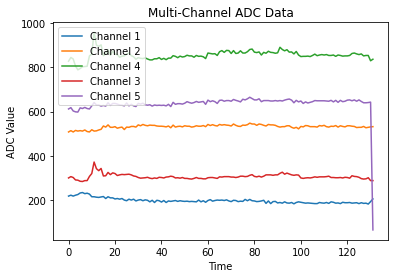

In [183]:

plt.plot(oxy_adc_df['channel1_o'], label='Channel 1')  # Add label for channel1
plt.plot(oxy_adc_df['channel2_o'],label='Channel 2')  # Uncomment if you want to include channel2
plt.plot(oxy_adc_df['channel4_o'], label='Channel 4')
plt.plot(oxy_adc_df['channel3_o'], label='Channel 3')
plt.plot(oxy_adc_df['channel5_o'], label='Channel 5')

plt.legend()

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


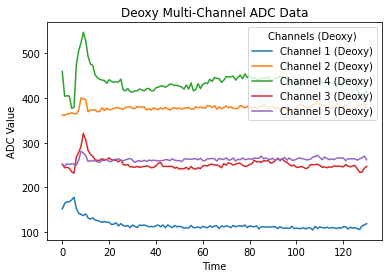

In [184]:

plt.plot(deoxy_adc_df['channel1_d'], label='Channel 1 (Deoxy)')  # Add label with clarification
plt.plot(deoxy_adc_df['channel2_d'], label='Channel 2 (Deoxy)')
plt.plot(deoxy_adc_df['channel4_d'], label='Channel 4 (Deoxy)')
plt.plot(deoxy_adc_df['channel3_d'], label='Channel 3 (Deoxy)')
plt.plot(deoxy_adc_df['channel5_d'], label='Channel 5 (Deoxy)')

# Add the legend with title
plt.legend(title='Channels (Deoxy)')

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Deoxy Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


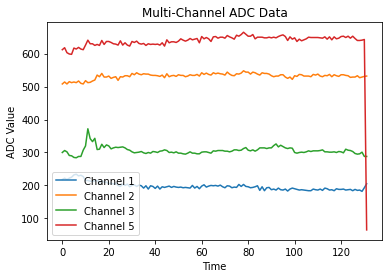

In [185]:

plt.plot(oxy_adc_df['channel1_o'], label='Channel 1')  # Add label for channel1
plt.plot(oxy_adc_df['channel2_o'],label='Channel 2')  # Uncomment if you want to include channel2
#plt.plot(oxy_adc_df['channel4_o'], label='Channel 4')
plt.plot(oxy_adc_df['channel3_o'], label='Channel 3')
plt.plot(oxy_adc_df['channel5_o'], label='Channel 5')

plt.legend()

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


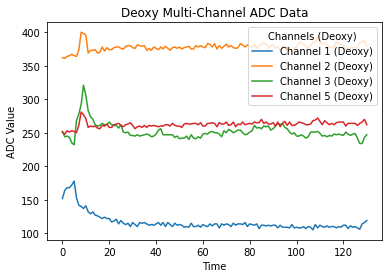

In [186]:

plt.plot(deoxy_adc_df['channel1_d'], label='Channel 1 (Deoxy)')  # Add label with clarification
plt.plot(deoxy_adc_df['channel2_d'], label='Channel 2 (Deoxy)')
#plt.plot(deoxy_adc_df['channel4_d'], label='Channel 4 (Deoxy)')
plt.plot(deoxy_adc_df['channel3_d'], label='Channel 3 (Deoxy)')
plt.plot(deoxy_adc_df['channel5_d'], label='Channel 5 (Deoxy)')

# Add the legend with title
plt.legend(title='Channels (Deoxy)')

# Other customizations (optional)
plt.xlabel('Time')
plt.ylabel('ADC Value')
plt.title('Deoxy Multi-Channel ADC Data')
#plt.grid(True)  # Add grid lines for better readability

plt.show()


Optical Density

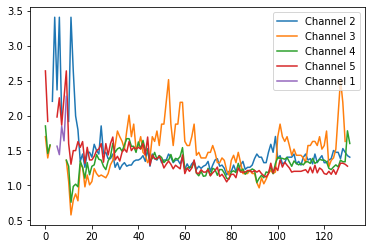

In [187]:
plt.plot(oxy_od_df[1],label='Channel 2')
plt.plot(oxy_od_df[2],label='Channel 3')
plt.plot(oxy_od_df[3],label='Channel 4')
plt.plot(oxy_od_df[4],label='Channel 5')
plt.plot(oxy_od_df[0],label='Channel 1')
plt.legend()

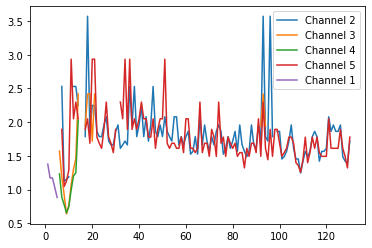

In [188]:
plt.plot(deoxy_od_df[1],label='Channel 2')
plt.plot(deoxy_od_df[2],label='Channel 3')
plt.plot(deoxy_od_df[3],label='Channel 4')
plt.plot(deoxy_od_df[4],label='Channel 5')
plt.plot(deoxy_od_df[0],label='Channel 1')
plt.legend()

In [189]:
from mes2hb.mes2hb import Mes2Hb

In [190]:
from mes2hb.mes2hb import Mes2Hb
converter = Mes2Hb()
#df = pd.read_csv('data/sample.csv')

#channel1= oxy_df['channel1_o'].values
#channel2 = oxy_df['channel2_o'].values
channel1= oxy_od_df[1].values
channel2 = oxy_od_df[2].values

a = converter.convert([channel1,channel2])
print(a)


(array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))
